In [25]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import jsonlines
sns.set_context("paper")
sns.set_style('darkgrid')

In [ ]:
def plot_correlation(df, save_path='./outputs/evaluation/correlation.png'):
    order = ['Insufficient_Weight','Normal_Weight',
             'Overweight_Level_I','Overweight_Level_II',
             'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
    plt.figure(figsize=(8, 8))
    sns.boxplot(x='NObeyesdad', y='score', data=df, hue='NObeyesdad', palette="husl",order=order)
    plt.title('Evaluation Score vs. Obesity Status')
    plt.xlabel('Obesity Status')
    plt.ylabel('Evaluation Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(save_path, dpi=900)

In [3]:
with open('./outputs/evaluation/score_real.json') as f:  
    score_real = json.load(f)

In [4]:
df = pd.DataFrame(score_real)

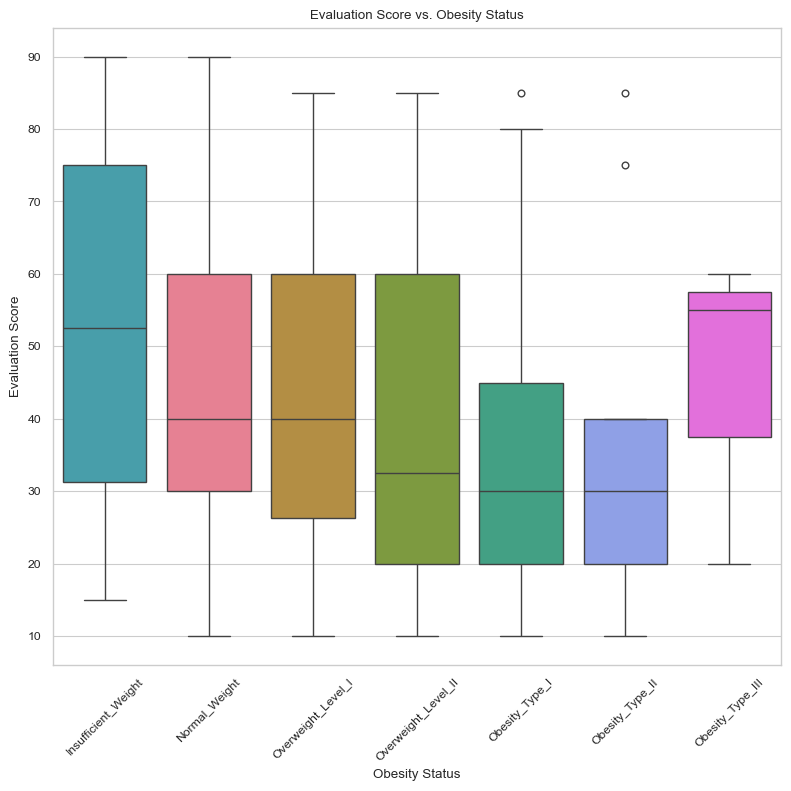

In [10]:
plot_correlation(df)

In [3]:
with open('./outputs/dialog_history_red/dialog_history_gpt3.5.jsonl', 'r', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line)

In [4]:
# print(data)
score_list = []
intervention_list = []
for item in data:
    
    if item['role']=='Evaluator':
        score_list.append(json.loads(item['content'])['score'])
    if item['role'] == 'Doctor':
        intervention_list.append((item['turn'],json.loads(item['content'])['intervention']))

In [5]:
score_list

[25, 40, 65, 60, 45, 45, 60, 55, 45, 50]

In [32]:
x = ['Round '+str(i+1) for i in range(len(score_list))]

In [6]:
intervention_list

[(1, {'FAF': 2, 'FCVC': 3, 'MTRANS': 'Walking'}),
 (2, {'NCP': 3, 'FAF': 3, 'MTRANS': 'Public_Transportation'}),
 (6, {'FAF': 2, 'SCC': 'no', 'CH2O': 3}),
 (9, {'FCVC': 3, 'FAF': 2, 'CALC': 'Sometimes'})]

In [62]:
def plot_trend(save_path='./outputs/evaluation/trend.png'):
    plt.figure(figsize=(8, 8))
    sns.lineplot(x=x, y=score_list, marker="o")
    for item in intervention_list:
        plt.text(item[0]-1,score_list[item[0]-1]+3,item[1],fontsize=8,rotation=70)
    plt.title('Score Trend')
    plt.xlabel('')
    plt.ylabel('Evaluation Score')
    plt.yticks(range(0, 101, 10))
    # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(save_path, dpi=900)

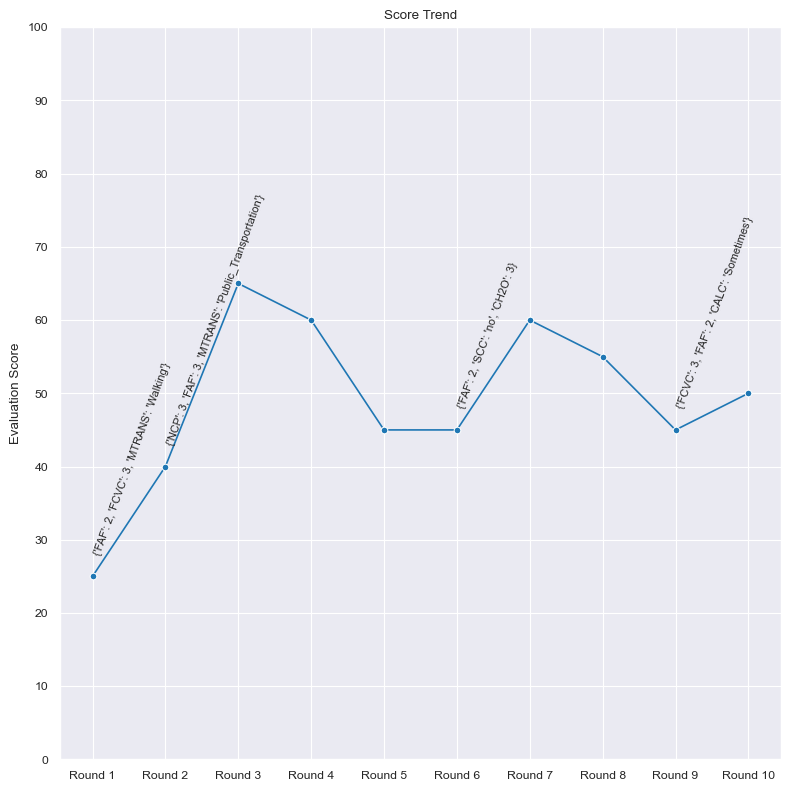

In [63]:
plot_trend()